<a href="https://colab.research.google.com/github/Kynantio/MachineLearning/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kynantio Candra Abrari
##2141720206 / 3A / 16

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan.
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
- Merubah color space
- Reduksi dimensi
- dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

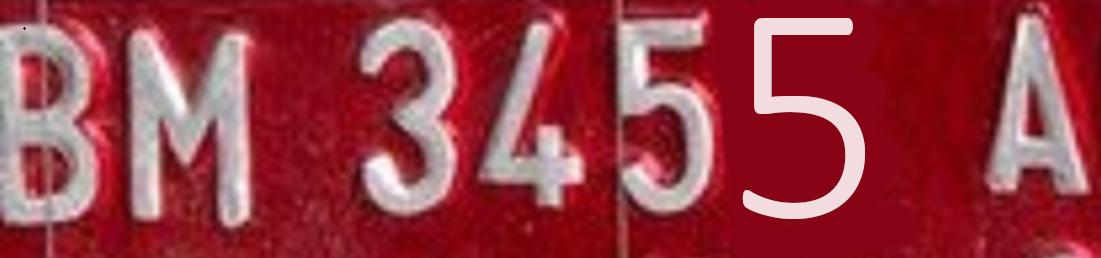

In [23]:
img = cv2.imread('/content/drive/MyDrive/Polinema/Machine Learning/BM3455A.jpg')

cv2_imshow(img)

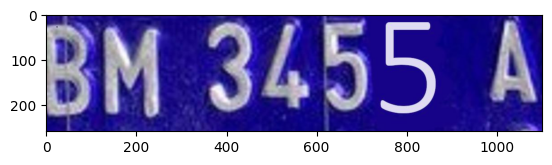

In [24]:
plt.imshow(img)

In [25]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

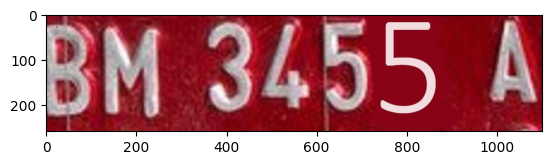

In [26]:
plt.imshow(img2)

In [27]:
img.shape

(258, 1101, 3)

In [28]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

258
1101
3


In [29]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(284058, 3)

In [30]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

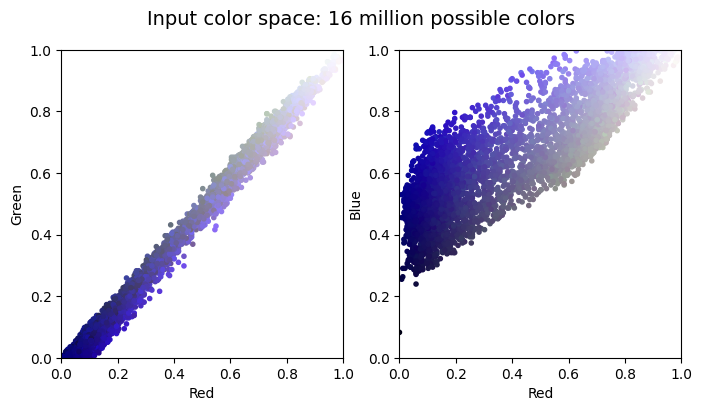

In [31]:
plot_pixels(data, title='Input color space: 16 million possible colors')

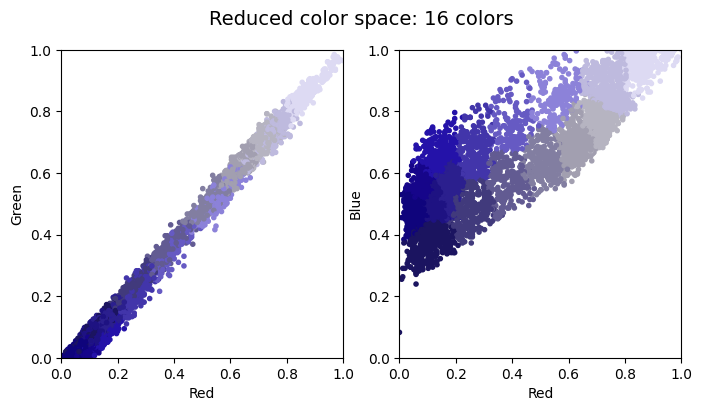

In [32]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

In [33]:
#convert int menjadi float
Z = np.float32(data)

In [34]:
print(Z.dtype, Z.shape)

float32 (284058, 3)


In [35]:
kriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
k=2
ret, label, center = cv2.kmeans(Z,k,None,kriteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [36]:
print(label)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [37]:
print(center)

[[0.11674354 0.06598634 0.5251354 ]
 [0.68234086 0.667679   0.78636754]]


In [38]:
segmented_data = center[label.flatten()]
segmented_data

array([[0.11674354, 0.06598634, 0.5251354 ],
       [0.11674354, 0.06598634, 0.5251354 ],
       [0.11674354, 0.06598634, 0.5251354 ],
       ...,
       [0.11674354, 0.06598634, 0.5251354 ],
       [0.11674354, 0.06598634, 0.5251354 ],
       [0.11674354, 0.06598634, 0.5251354 ]], dtype=float32)

In [39]:
segmented_image = segmented_data.reshape((img2.shape))
segmented_image

array([[[0.11674354, 0.06598634, 0.5251354 ],
        [0.11674354, 0.06598634, 0.5251354 ],
        [0.11674354, 0.06598634, 0.5251354 ],
        ...,
        [0.11674354, 0.06598634, 0.5251354 ],
        [0.11674354, 0.06598634, 0.5251354 ],
        [0.11674354, 0.06598634, 0.5251354 ]],

       [[0.11674354, 0.06598634, 0.5251354 ],
        [0.11674354, 0.06598634, 0.5251354 ],
        [0.11674354, 0.06598634, 0.5251354 ],
        ...,
        [0.11674354, 0.06598634, 0.5251354 ],
        [0.11674354, 0.06598634, 0.5251354 ],
        [0.11674354, 0.06598634, 0.5251354 ]],

       [[0.11674354, 0.06598634, 0.5251354 ],
        [0.11674354, 0.06598634, 0.5251354 ],
        [0.11674354, 0.06598634, 0.5251354 ],
        ...,
        [0.11674354, 0.06598634, 0.5251354 ],
        [0.11674354, 0.06598634, 0.5251354 ],
        [0.11674354, 0.06598634, 0.5251354 ]],

       ...,

       [[0.11674354, 0.06598634, 0.5251354 ],
        [0.11674354, 0.06598634, 0.5251354 ],
        [0.11674354, 0

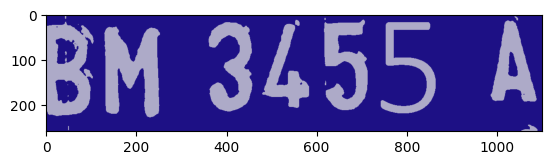

In [40]:
plt.imshow(segmented_image)

Text(0.5, 1.0, '2-color Image')

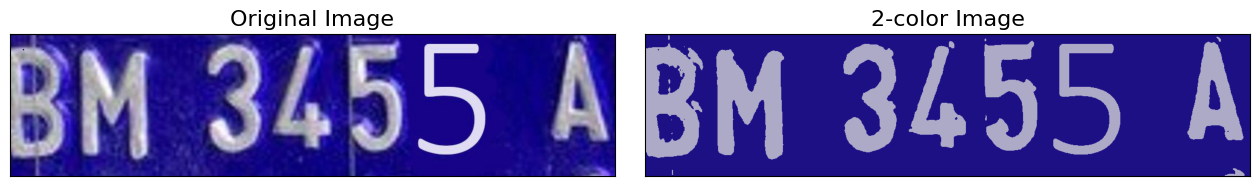

In [41]:
img_recolored = new_colors.reshape(img2.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(segmented_image)
ax[1].set_title('2-color Image', size=16)